Part A Results:
Sample Size: 10, Confidence Level: 0.9
Mean Coverage: 0.8930
Std Dev Coverage: 0.8760

Sample Size: 10, Confidence Level: 0.95
Mean Coverage: 0.9550
Std Dev Coverage: 0.9620

Sample Size: 10, Confidence Level: 0.99
Mean Coverage: 0.9880
Std Dev Coverage: 0.9870

Sample Size: 30, Confidence Level: 0.9
Mean Coverage: 0.9230
Std Dev Coverage: 0.9040

Sample Size: 30, Confidence Level: 0.95
Mean Coverage: 0.9560
Std Dev Coverage: 0.9490

Sample Size: 30, Confidence Level: 0.99
Mean Coverage: 0.9940
Std Dev Coverage: 0.9910

Sample Size: 50, Confidence Level: 0.9
Mean Coverage: 0.9130
Std Dev Coverage: 0.8870

Sample Size: 50, Confidence Level: 0.95
Mean Coverage: 0.9430
Std Dev Coverage: 0.9390

Sample Size: 50, Confidence Level: 0.99
Mean Coverage: 0.9910
Std Dev Coverage: 0.9910



(0.0, 1.0)

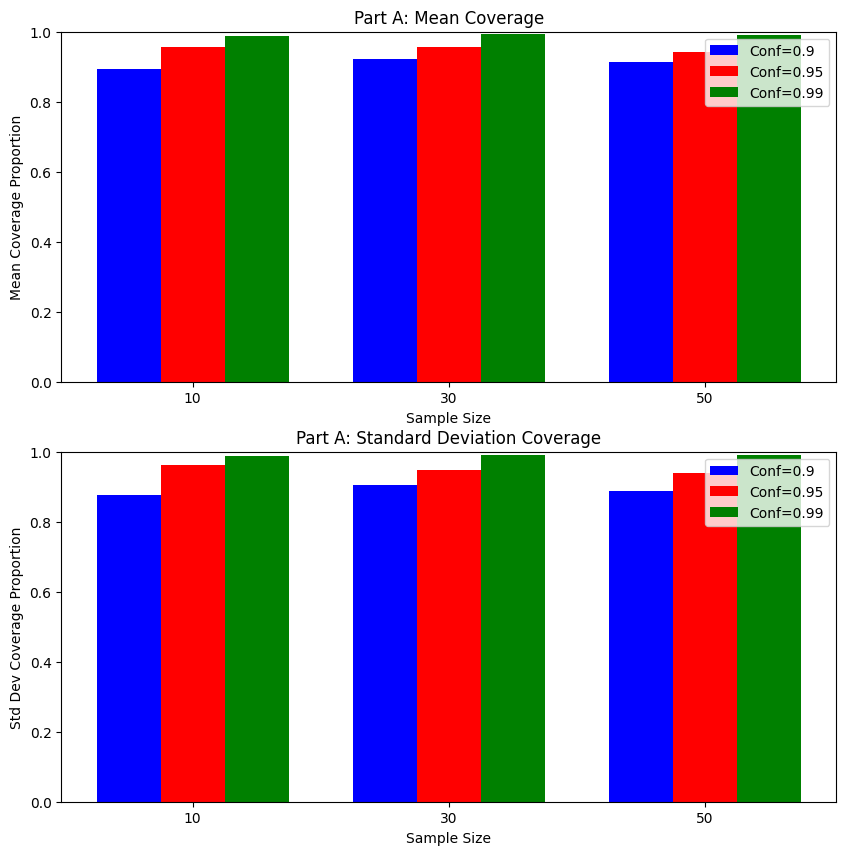

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def part_a_simulation(true_mean=100, true_std=5, num_simulations=1000, sample_sizes=[10, 30, 50], confidence_levels=[0.9, 0.95, 0.99]):
    results = {}

    for n in sample_sizes:
        for conf_level in confidence_levels:
            alpha = 1 - conf_level
            mean_covers = 0
            std_covers = 0

            for _ in range(num_simulations):
                # Generate sample
                sample = np.random.normal(true_mean, true_std, n)

                # Confidence interval for mean
                sample_mean = np.mean(sample)
                sample_std = np.std(sample, ddof=1)

                # t-distribution confidence interval for mean
                t_value = stats.t.ppf(1 - alpha/2, df=n-1)
                mean_ci_lower = sample_mean - t_value * (sample_std / np.sqrt(n))
                mean_ci_upper = sample_mean + t_value * (sample_std / np.sqrt(n))

                # Chi-square confidence interval for standard deviation
                chi2_lower = stats.chi2.ppf(alpha/2, df=n-1)
                chi2_upper = stats.chi2.ppf(1 - alpha/2, df=n-1)
                std_ci_lower = np.sqrt((n-1) * sample_std**2 / chi2_upper)
                std_ci_upper = np.sqrt((n-1) * sample_std**2 / chi2_lower)

                # Check if true parameters are within intervals
                mean_covers += (true_mean >= mean_ci_lower and true_mean <= mean_ci_upper)
                std_covers += (true_std >= std_ci_lower and true_std <= std_ci_upper)

            # Calculate coverage proportion
            mean_coverage = mean_covers / num_simulations
            std_coverage = std_covers / num_simulations

            results[(n, conf_level)] = {
                'mean_coverage': mean_coverage,
                'std_coverage': std_coverage
            }

    return results


# Part A Simulation
part_a_results = part_a_simulation()
print("Part A Results:")
for params, result in part_a_results.items():
    print(f"Sample Size: {params[0]}, Confidence Level: {params[1]}")
    print(f"Mean Coverage: {result['mean_coverage']:.4f}")
    print(f"Std Dev Coverage: {result['std_coverage']:.4f}\n")

sample_sizes = sorted(set(k[0] for k in part_a_results.keys()))
confidence_levels = [0.90, 0.95, 0.99]
# Part A: Mean Coverage Visualization
plt.figure(figsize=(10, 10))

# Mean Coverage Plot
plt.subplot(2, 1, 1)
plt.title('Part A: Mean Coverage')

x = np.arange(len(sample_sizes))
width = 0.25

for i, conf in enumerate(confidence_levels):
    mean_coverages = [part_a_results.get((n, conf), {'mean_coverage': 0})['mean_coverage'] for n in sample_sizes]
    plt.bar(x + i*width, mean_coverages, width,
            label=f'Conf={conf}',
            color=['blue', 'red', 'green'][i])

plt.xlabel('Sample Size')
plt.ylabel('Mean Coverage Proportion')
plt.xticks(x + width, sample_sizes)
plt.legend()
plt.ylim(0, 1)

# Part A: Standard Deviation Coverage Plot
plt.subplot(2, 1, 2)
plt.title('Part A: Standard Deviation Coverage')

for i, conf in enumerate(confidence_levels):
    std_coverages = [part_a_results.get((n, conf), {'std_coverage': 0})['std_coverage'] for n in sample_sizes]
    plt.bar(x + i*width, std_coverages, width,
            label=f'Conf={conf}',
            color=['blue', 'red', 'green'][i])

plt.xlabel('Sample Size')
plt.ylabel('Std Dev Coverage Proportion')
plt.xticks(x + width, sample_sizes)
plt.legend()
plt.ylim(0, 1)

Part B Results:
Sample Size: 10, Confidence Level: 0.9
Mean Coverage: 0.8930
Std Dev Coverage: 0.8920

Sample Size: 10, Confidence Level: 0.95
Mean Coverage: 0.9380
Std Dev Coverage: 0.9510

Sample Size: 10, Confidence Level: 0.99
Mean Coverage: 0.9910
Std Dev Coverage: 0.9930

Sample Size: 30, Confidence Level: 0.9
Mean Coverage: 0.8950
Std Dev Coverage: 0.8720

Sample Size: 30, Confidence Level: 0.95
Mean Coverage: 0.9450
Std Dev Coverage: 0.9460

Sample Size: 30, Confidence Level: 0.99
Mean Coverage: 0.9870
Std Dev Coverage: 0.9860

Sample Size: 50, Confidence Level: 0.9
Mean Coverage: 0.9130
Std Dev Coverage: 0.8820

Sample Size: 50, Confidence Level: 0.95
Mean Coverage: 0.9440
Std Dev Coverage: 0.9400

Sample Size: 50, Confidence Level: 0.99
Mean Coverage: 0.9910
Std Dev Coverage: 0.9890



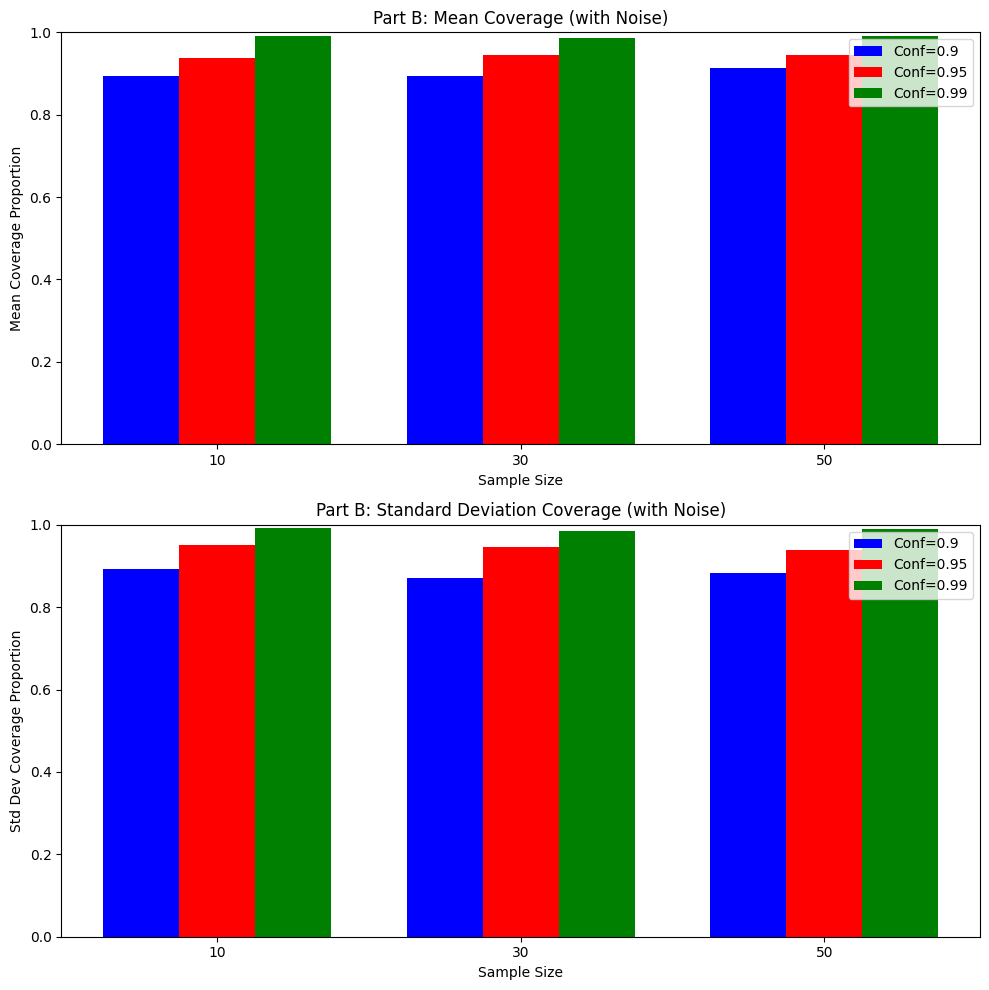

In [11]:
def part_b_simulation(true_mean=50, true_std=5, num_simulations=1000, sample_sizes=[10, 30, 50], confidence_levels=[0.90, 0.95, 0.99]):
    results = {}

    for n in sample_sizes:
        for conf_level in confidence_levels:
            alpha = 1 - conf_level
            mean_covers = 0
            std_covers = 0

            for _ in range(num_simulations):
                # Generate sample with uniform noise
                sample = np.random.normal(true_mean, true_std, n)
                noise = np.random.uniform(-1, 1, n)
                noisy_sample = sample + noise

                # Confidence interval for mean
                sample_mean = np.mean(noisy_sample)
                sample_std = np.std(noisy_sample, ddof=1)

                # t-distribution confidence interval for mean
                t_value = stats.t.ppf(1 - alpha/2, df=n-1)
                mean_ci_lower = sample_mean - t_value * (sample_std / np.sqrt(n))
                mean_ci_upper = sample_mean + t_value * (sample_std / np.sqrt(n))

                # Chi-square confidence interval for standard deviation
                chi2_lower = stats.chi2.ppf(alpha/2, df=n-1)
                chi2_upper = stats.chi2.ppf(1 - alpha/2, df=n-1)
                std_ci_lower = np.sqrt((n-1) * sample_std**2 / chi2_upper)
                std_ci_upper = np.sqrt((n-1) * sample_std**2 / chi2_lower)

                # Check if true parameters are within intervals
                mean_covers += (true_mean >= mean_ci_lower and true_mean <= mean_ci_upper)
                std_covers += (true_std >= std_ci_lower and true_std <= std_ci_upper)

            # Calculate coverage proportion
            mean_coverage = mean_covers / num_simulations
            std_coverage = std_covers / num_simulations

            results[(n, conf_level)] = {
                'mean_coverage': mean_coverage,
                'std_coverage': std_coverage
            }

    return results

part_b_results = part_b_simulation()
print("Part B Results:")
for params, result in part_b_results.items():
    print(f"Sample Size: {params[0]}, Confidence Level: {params[1]}")
    print(f"Mean Coverage: {result['mean_coverage']:.4f}")
    print(f"Std Dev Coverage: {result['std_coverage']:.4f}\n")

# Part B Results
plt.figure(figsize=(10, 10))

# Part B: Mean Coverage Visualization
plt.subplot(2, 1, 1)
plt.title('Part B: Mean Coverage (with Noise)')

for i, conf in enumerate(confidence_levels):
    mean_coverages = [part_b_results.get((n, conf), {'mean_coverage': 0})['mean_coverage'] for n in sample_sizes]
    plt.bar(x + i*width, mean_coverages, width,
            label=f'Conf={conf}',
            color=['blue', 'red', 'green'][i])

plt.xlabel('Sample Size')
plt.ylabel('Mean Coverage Proportion')
plt.xticks(x + width, sample_sizes)
plt.legend()
plt.ylim(0, 1)

# Part B: Standard Deviation Coverage Plot
plt.subplot(2, 1, 2)
plt.title('Part B: Standard Deviation Coverage (with Noise)')

for i, conf in enumerate(confidence_levels):
    std_coverages = [part_b_results.get((n, conf), {'std_coverage': 0})['std_coverage'] for n in sample_sizes]
    plt.bar(x + i*width, std_coverages, width,
            label=f'Conf={conf}',
            color=['blue', 'red', 'green'][i])

plt.xlabel('Sample Size')
plt.ylabel('Std Dev Coverage Proportion')
plt.xticks(x + width, sample_sizes)
plt.legend()
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

Iterations: 50
True Difference in Effectiveness: 2
Confidence Interval Coverage Rate: 98.00%
Number of Captured Intervals: 49
Number of Missed Intervals: 1

Iterations: 100
True Difference in Effectiveness: 2
Confidence Interval Coverage Rate: 91.00%
Number of Captured Intervals: 91
Number of Missed Intervals: 9

Iterations: 500
True Difference in Effectiveness: 2
Confidence Interval Coverage Rate: 95.60%
Number of Captured Intervals: 478
Number of Missed Intervals: 22

Iterations: 1000
True Difference in Effectiveness: 2
Confidence Interval Coverage Rate: 95.30%
Number of Captured Intervals: 953
Number of Missed Intervals: 47



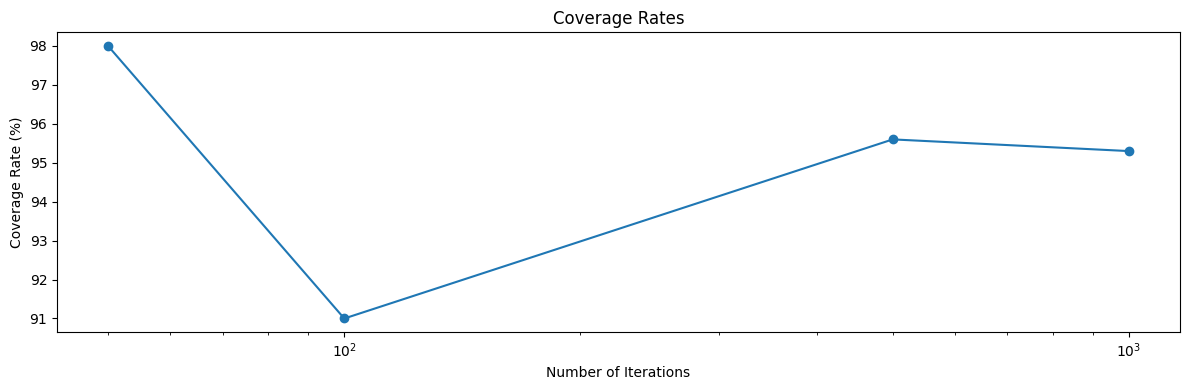

In [16]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def monte_carlo_simulation(mu1, sigma1, n1, mu2, sigma2, n2, m=1000, true_diff=None):
    if true_diff is None:
        true_diff = mu1 - mu2
    capture_count = 0
    all_intervals = []

    for _ in range(m):
        X1 = np.random.normal(mu1, sigma1, n1)
        X2 = np.random.normal(mu2, sigma2, n2)
        confidence = 0.95

        mean1, mean2 = np.mean(X1), np.mean(X2)
        std1, std2 = np.std(X1, ddof=1), np.std(X2, ddof=1)
        n1, n2 = len(X1), len(X2)

        se = np.sqrt((std1**2/n1) + (std2**2/n2))

        df = ((std1**2/n1 + std2**2/n2)**2) / ((std1**2/n1)**2/(n1-1) + (std2**2/n2)**2/(n2-1))

        t_stat = stats.t.ppf((1 + confidence) / 2, df)

        diff_mean = mean1 - mean2
        margin_error = t_stat * se
        ci_lower = diff_mean - margin_error
        ci_upper = diff_mean + margin_error

        captured = ci_lower <= true_diff <= ci_upper
        capture_count += captured

        all_intervals.append({
            'ci_lower': ci_lower,
            'ci_upper': ci_upper,
            'diff_mean': diff_mean,
            'captured': captured
        })

    coverage_rate = capture_count / m
    return {
        'intervals': all_intervals,
        'coverage_rate': coverage_rate,
        'true_difference': true_diff
    }

# Simulation Parameters
mu1, sigma1 = 10, 2
mu2, sigma2 = 8, 2.5
n1, n2 = 50, 50
ms = [50, 100, 500, 1000]

# Prepare lists to store results
coverage_rates = []

# Run Simulations
for m in ms:
    results = monte_carlo_simulation(mu1, sigma1, n1, mu2, sigma2, n2, m)

    # Store results
    coverage_rates.append(results['coverage_rate'] * 100)
    captures = [interval['captured'] for interval in results['intervals']]

    # Print results
    print(f"Iterations: {m}")
    print(f"True Difference in Effectiveness: {results['true_difference']}")
    print(f"Confidence Interval Coverage Rate: {results['coverage_rate'] * 100:.2f}%")
    print(f"Number of Captured Intervals: {sum(captures)}")
    print(f"Number of Missed Intervals: {m - sum(captures)}")
    print()

# Visualization
plt.figure(figsize=(12, 4))

plt.plot(ms, coverage_rates, marker='o')
plt.title('Coverage Rates')
plt.xlabel('Number of Iterations')
plt.ylabel('Coverage Rate (%)')
plt.xscale('log')

plt.tight_layout()
plt.show()


Results for p = 0.2:
  Sample Size 10:
    Coverage Probability: 0.8690
    Average Interval Width: 0.3966
  Sample Size 50:
    Coverage Probability: 0.9340
    Average Interval Width: 0.2179
  Sample Size 100:
    Coverage Probability: 0.9380
    Average Interval Width: 0.1552
  Sample Size 500:
    Coverage Probability: 0.9540
    Average Interval Width: 0.0699
  Sample Size 1000:
    Coverage Probability: 0.9460
    Average Interval Width: 0.0496

Results for p = 0.5:
  Sample Size 10:
    Coverage Probability: 0.8680
    Average Interval Width: 0.5772
  Sample Size 50:
    Coverage Probability: 0.9420
    Average Interval Width: 0.2745
  Sample Size 100:
    Coverage Probability: 0.9390
    Average Interval Width: 0.1950
  Sample Size 500:
    Coverage Probability: 0.9340
    Average Interval Width: 0.0876
  Sample Size 1000:
    Coverage Probability: 0.9460
    Average Interval Width: 0.0620

Results for p = 0.8:
  Sample Size 10:
    Coverage Probability: 0.8980
    Average Int

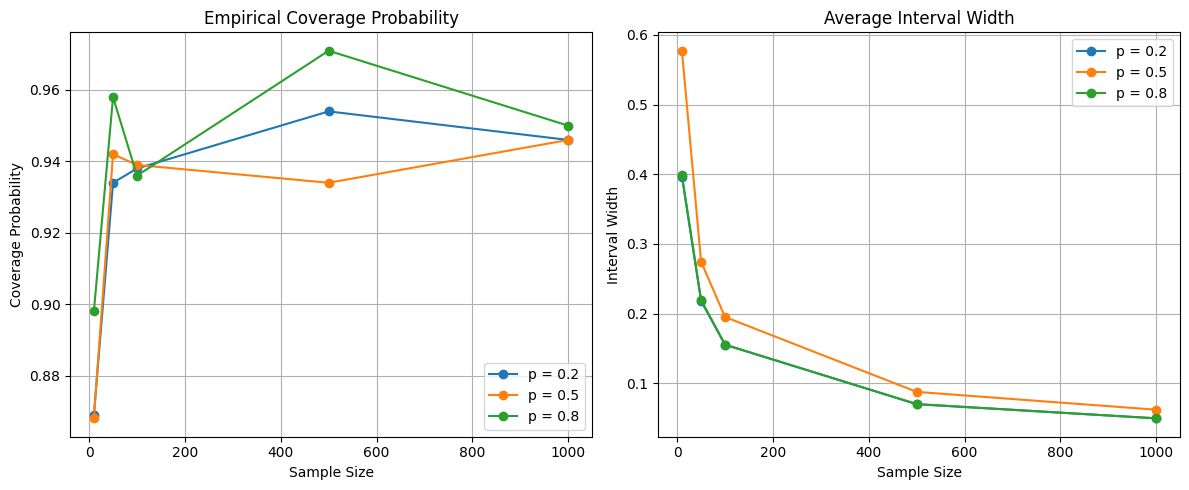

In [17]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

p_values = [0.2, 0.5, 0.8]
sample_sizes = [10, 50, 100, 500, 1000]
confidence_level = 0.95

results = {}

for p in p_values:
    results[p] = {}
    for n in sample_sizes:

        coverage_count = 0
        interval_widths = []

        for _ in range(1000):
            samples = np.random.binomial(1, p, n)
            sample_proportion = np.mean(samples)
            standard_error = np.sqrt((sample_proportion * (1 - sample_proportion)) / n)
            z_score = stats.norm.ppf((1 + confidence_level) / 2)
            lower_bound = max(0, sample_proportion - z_score * standard_error)
            upper_bound = min(1, sample_proportion + z_score * standard_error)


            if lower_bound <= p <= upper_bound:
                coverage_count += 1

            interval_widths.append(upper_bound - lower_bound)


        coverage_prob = coverage_count / 1000

        results[p][n] = {
            'coverage_probability': coverage_prob,
            'avg_interval_width': np.mean(interval_widths)
        }

for p in p_values:
    print(f"\nResults for p = {p}:")
    for n in sample_sizes:
        print(f"  Sample Size {n}:")
        print(f"    Coverage Probability: {results[p][n]['coverage_probability']:.4f}")
        print(f"    Average Interval Width: {results[p][n]['avg_interval_width']:.4f}")

p_values = list(results.keys())
sample_sizes = list(list(results[p_values[0]].keys()))


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for p in p_values:
    coverages = [results[p][n]['coverage_probability'] for n in sample_sizes]
    plt.plot(sample_sizes, coverages, marker='o', label=f'p = {p}')

plt.title('Empirical Coverage Probability')
plt.xlabel('Sample Size')
plt.ylabel('Coverage Probability')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
for p in p_values:
    widths = [results[p][n]['avg_interval_width'] for n in sample_sizes]
    plt.plot(sample_sizes, widths, marker='o', label=f'p = {p}')

plt.title('Average Interval Width')
plt.xlabel('Sample Size')
plt.ylabel('Interval Width')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()